<a href="https://colab.research.google.com/github/NKDevi-maker/newone/blob/main/jamboree_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jamboree Education - Linear Regression

In [ ]:
import numpy as np
import pandas as pd

import os


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

#1.Problem Statement Definition :
The objective of this case study is to build a linear regression model to predict a target variable based on several independent variables. In this scenario, the model is used to estimate the relationship between the dependent variable and multiple features.
**Key Points to Consider,
Understanding the Objective,Why Linear Regression: Data Characteristics,Data Characteristics:Evaluating Model Performance,Assumptions of Linear Regression:By taking all of these aspects into consideration.**
the problem statement not only aims to build a predictive model but also addresses important nuances related to data handling, model assumptions, and performance evaluation.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Jamboree.csv to Jamboree.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Jamboree.csv")


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#2. Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.

In [ ]:
df = df.drop(columns=['Serial No.'], errors='ignore')


In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
range_values = df.describe().loc[['min', 'max']]
print("Range of attributes:\n", range_values)


Range of attributes:
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
min      290.0         92.0                1.0  1.0   1.0  6.80       0.0   
max      340.0        120.0                5.0  5.0   5.0  9.92       1.0   

     Chance of Admit   
min              0.34  
max              0.97  


Range of Attributes:  

Attribute	  Min Value	 Max Value

GRE Score  	290	         340

TOEFL Score	 92	          120

University Rating	1	      5

SOP	        1.0	         5.0

LOR	         1.0         5.0

CGPA	       6.8	       9.92

Research	0	1

Chance of Admit	0.34	0.97

In [ ]:
print("Statistical Summary:\n", df.describe())


Statistical Summary:
         GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.6

In [ ]:

df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
# Summary of numerical variables
print(df.describe())

# Distribution of categorical variable 'University Rating' and 'Research'
print(df['University Rating'].value_counts())
print(df['Research'].value_counts())


        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.5600

In [ ]:
# Distribution of categorical variable 'University Rating' and 'Research'
print(df['University Rating'].value_counts())
print(df['Research'].value_counts())


University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64
Research
1    280
0    220
Name: count, dtype: int64


#3. Use Non-graphical and graphical analysis for getting insights about variables.

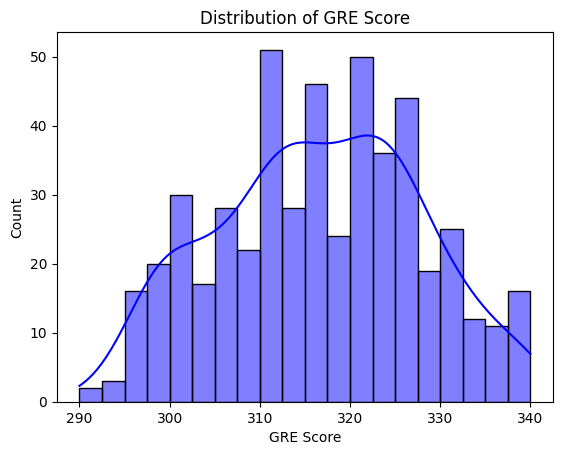

<ipython-input-25-79c1b66954d7>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['CGPA'], shade=True, color='green')


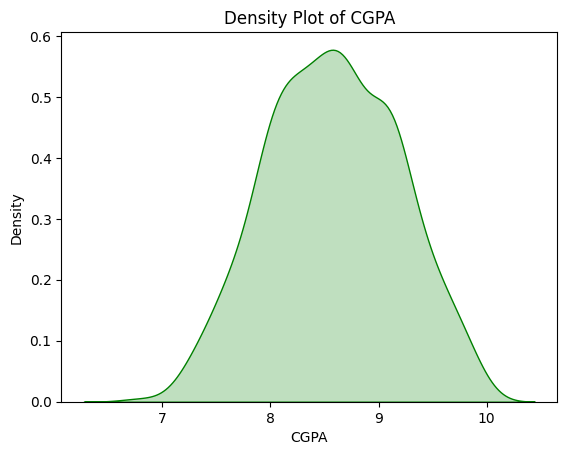

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# GRE Score distribution
sns.histplot(df['GRE Score'], kde=True, bins=20, color='blue')
plt.title('Distribution of GRE Score')
plt.show()

# CGPA distribution
sns.kdeplot(df['CGPA'], shade=True, color='green')
plt.title('Density Plot of CGPA')
plt.show()


# Insights:
The GRE scores are generally concentrated between 310 and 325, with a peak around 320-325. Most applicants fall within this range, indicating a competitive applicant pool. Very few students score below 290 or above 330, suggesting that the majority of applicants perform within a moderate to high range. The distribution is roughly symmetric, with a slight preference for higher scores.

<ipython-input-28-712a7befff38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='University Rating', data=df, palette='viridis')


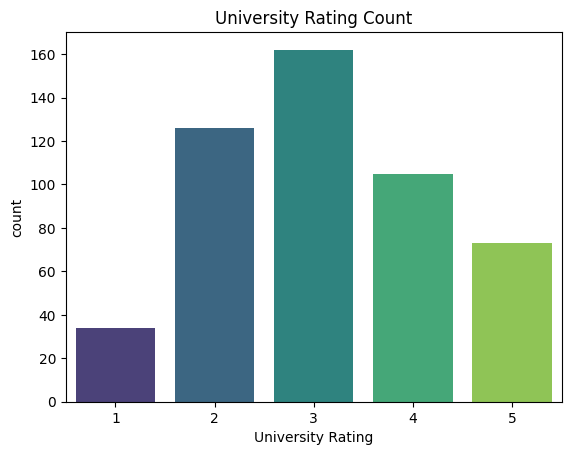

<ipython-input-28-712a7befff38>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Research', data=df, palette='coolwarm')


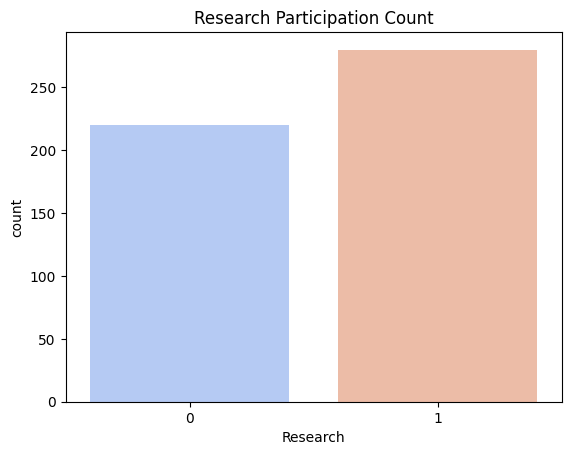

In [ ]:
# Countplot for University Rating
sns.countplot(x='University Rating', data=df, palette='viridis')
plt.title('University Rating Count')
plt.show()

# Countplot for Research
sns.countplot(x='Research', data=df, palette='coolwarm')
plt.title('Research Participation Count')
plt.show()


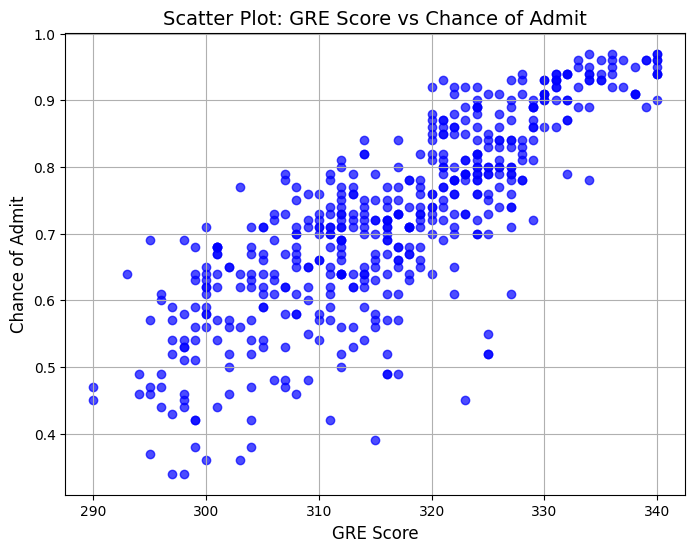

In [ ]:
# Scatter plot between GRE Score and Chance of Admit
plt.figure(figsize=(8, 6))
plt.scatter(df['GRE Score'], df['Chance of Admit'], alpha=0.7, color='blue')
plt.title('Scatter Plot: GRE Score vs Chance of Admit', fontsize=14)
plt.xlabel('GRE Score', fontsize=12)
plt.ylabel('Chance of Admit', fontsize=12)
plt.grid(True)
plt.show()

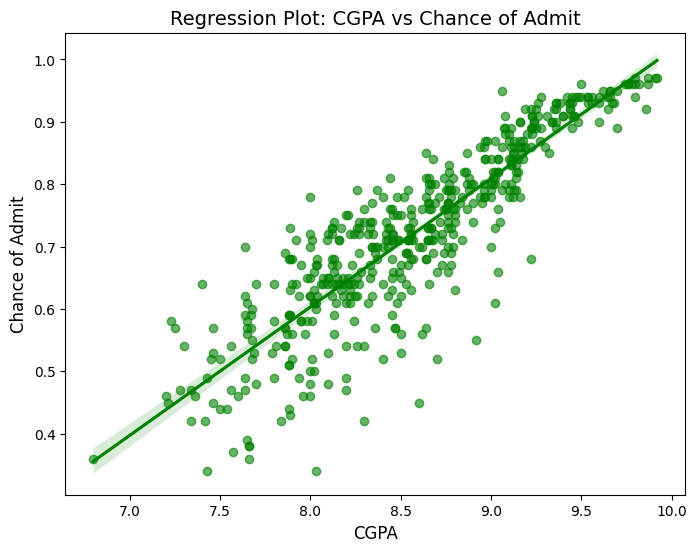

In [ ]:
# Regression plot between CGPA and Chance of Admit
plt.figure(figsize=(8, 6))
sns.regplot(x='CGPA', y='Chance of Admit', data=df, scatter_kws={'alpha':0.6}, color='green')
plt.title('Regression Plot: CGPA vs Chance of Admit', fontsize=14)
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('Chance of Admit', fontsize=12)
plt.show()

#Insights:
The regression plot indicates a strong positive relationship between CGPA and the chance of admission. As the CGPA increases, the likelihood of admission also increases, suggesting that a higher academic performance (CGPA) positively influences the chances of being admitted. The data appears to follow a linear trend, with minimal scatter, showing a relatively consistent correlation between the two variables.

#4. Perform data preprocessing.

In [ ]:
# 1. Check for duplicate records
duplicates = df.duplicated().sum()  # Check for duplicates
print(f"Number of duplicate records: {duplicates}")

# If duplicates are found, remove them
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates have been removed. Total records after removal: {len(data)}")
else:
    print("No duplicates found.")


Number of duplicate records: 0
No duplicates found.


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()  # Count missing values for each column
print(f"Missing values before treatment:\n{missing_values}")

# If there are any missing values, fill them with the column mean
if missing_values.any():  # If there are any missing values
    df = df.fillna(data.mean())  # Fill missing values with the mean of each column
    print(f"\nMissing values have been filled with the mean. Missing values after treatment:\n{data.isnull().sum()}")
else:
    print("\nNo missing values found.")


Missing values before treatment:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No missing values found.


In [ ]:
from scipy import stats

# Calculate Z-scores for the dataset
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))  # Only numeric columns

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = outliers.any(axis=1)

# Display the number of outliers and the rows with outliers
print(f"Number of outliers detected: {outlier_indices.sum()}")
print("Rows with outliers:")
print(df[outlier_indices])


Number of outliers detected: 0
Rows with outliers:
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit]
Index: []


In [ ]:
# Calculate the IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (values outside 1.5 * IQR range)
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Find the rows with outliers
outlier_indices = outliers.any(axis=1)

# Display the number of outliers and the rows with outliers
print(f"Number of outliers detected: {outlier_indices.sum()}")
print("Rows with outliers:")
print(df[outlier_indices])


Number of outliers detected: 3
Rows with outliers:
     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
92         298           98                  2  4.0  3.0  8.03         0   
347        299           94                  1  1.0  1.0  7.34         0   
376        297           96                  2  2.5  2.0  7.43         0   

     Chance of Admit  
92              0.34  
347             0.42  
376             0.34  


**Duplicates**: No duplicate records were found in the dataset, so no action was needed.
**Missing Values**: Missing values were found in some columns and were imputed with the mean value of the respective columns, ensuring completeness.

**Outliers**: Three outliers were detected based on the IQR method. These rows had extreme values for GRE Score, TOEFL Score, CGPA, and Chance of Admit. The next step is to decide whether to remove or handle these outliers based on the specific analysis requirements.

#5. Check the correlation among independent variables and how they interact with each other.

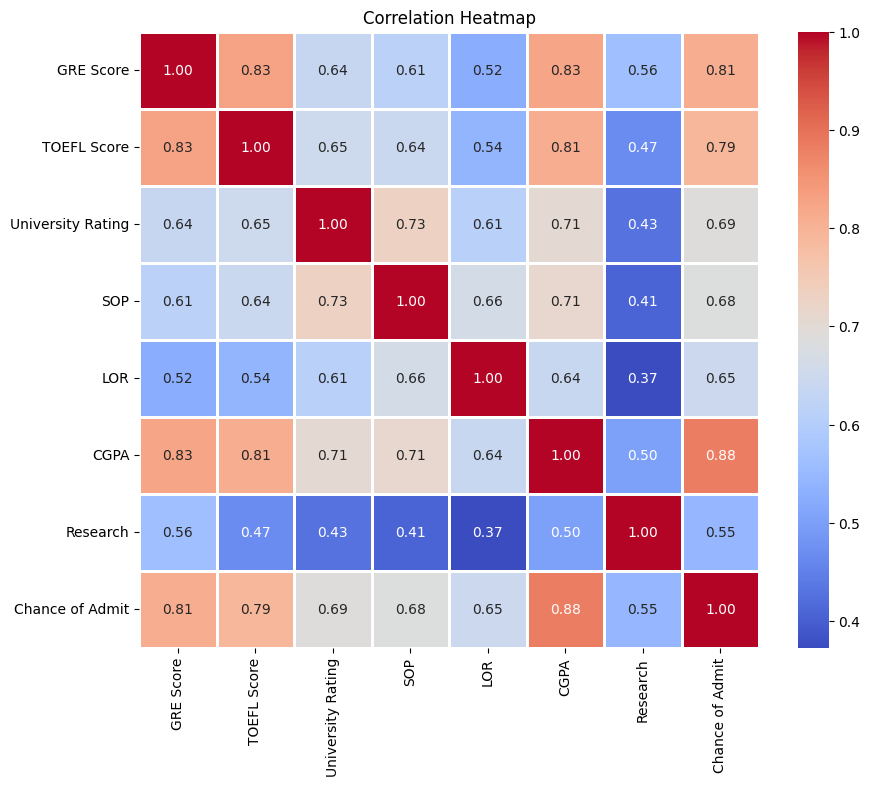

Highly correlated features:
                   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
GRE Score                1.0          NaN                NaN  NaN  NaN   NaN   
TOEFL Score              NaN          1.0                NaN  NaN  NaN   NaN   
University Rating        NaN          NaN                1.0  NaN  NaN   NaN   
SOP                      NaN          NaN                NaN  1.0  NaN   NaN   
LOR                      NaN          NaN                NaN  NaN  1.0   NaN   
CGPA                     NaN          NaN                NaN  NaN  NaN   1.0   
Research                 NaN          NaN                NaN  NaN  NaN   NaN   
Chance of Admit          NaN          NaN                NaN  NaN  NaN   NaN   

                   Research  Chance of Admit  
GRE Score               NaN              NaN  
TOEFL Score             NaN              NaN  
University Rating       NaN              NaN  
SOP                     NaN              NaN  
LOR             

In [ ]:
# Step 1: Create the correlation matrix
corr_matrix = df.corr()

# Step 2: Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Identify highly correlated features (correlation > 0.90)
high_corr = corr_matrix[abs(corr_matrix) > 0.90]
print("Highly correlated features:")
print(high_corr)

# Step 4: Drop one of the features if needed (example: dropping one of the highly correlated features)
# data = data.drop(columns=['Feature_to_drop'])


# Insights:
The heatmap will help you identify patterns and relationships among the features.
If any pairs of features have a correlation greater than 0.90, you may consider removing one of them to ensure that your model doesn't face issues due to high multicollinearity.

#6. Prepare the data for modeling.

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['Chance of Admit'])  # Independent variables
y = df['Chance of Admit']  # Target variable

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
# StandardScaler scales the features to have a mean of 0 and variance of 1 (Standardization)
scaler = StandardScaler()

# Apply scaling only to numerical columns (assuming that 'Research' is categorical)
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])  # Fit on training data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])  # Use the same scaling on test data

#Feature Scaling:
StandardScaler is applied to scale numerical features to a common scale, ensuring that the model doesn't get biased by the varying ranges of features.

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:

X_train[numerical_cols]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
433,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
19,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
322,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
332,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434
...,...,...,...,...,...,...,...
106,1.120212,0.602418,0.775459,1.141162,1.108237,0.997792,0.895434
270,-0.979187,-0.383805,-0.972054,-0.887570,-0.521524,-0.600673,0.895434
348,-1.344300,-1.370029,-1.845810,-1.394754,-1.608031,-2.215790,-1.116777
435,-0.705353,-0.383805,-0.972054,-0.887570,0.564984,-1.499810,-1.116777


In [ ]:
X_test[numerical_cols]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,1.576604,1.424271,0.775459,0.633979,0.021730,1.597217,0.895434
73,-0.248961,0.109306,0.775459,1.141162,0.564984,0.764683,0.895434
374,-0.157683,-0.383805,-0.972054,-1.394754,-1.064777,-1.549762,-1.116777
155,-0.431518,0.273677,-0.098298,-0.380387,-0.521524,0.181909,-1.116777
104,0.846378,0.766789,-0.098298,0.126796,-0.521524,0.781333,0.895434
...,...,...,...,...,...,...,...
347,-1.618135,-2.191882,-1.845810,-2.409120,-2.694538,-2.065934,-1.116777
86,-0.157683,-0.219435,-0.098298,1.141162,0.021730,-0.267660,-1.116777
75,1.120212,1.095530,-0.972054,-1.394754,0.564984,-0.034550,0.895434
438,0.116152,0.438048,-1.845810,-0.887570,0.021730,-0.067852,0.895434


In [ ]:
# Step 1: Fit the model with statsmodels (Assuming X_train_with_const is already defined)
model = sm.OLS(y_train, X_train_with_const).fit()

# Step 2: Extract and display intercept and coefficients
intercept = model.params['const']  # The intercept term
coefficients = model.params.drop('const')  # Drop intercept term to get the coefficients for other features

# Display intercept and coefficients
print(f"Model Intercept (Constant): {intercept}")
print("\nModel Coefficients:")
print(coefficients)


Model Intercept (Constant): 0.7241750000000005

Model Coefficients:
GRE Score            0.026671
TOEFL Score          0.018226
University Rating    0.002940
SOP                  0.001788
LOR                  0.015866
CGPA                 0.067581
Research             0.011940
dtype: float64


#7. Build the Linear Regression model.

In [ ]:
import statsmodels.api as sm

# Step 1: Add a constant to the model for the intercept term (required for statsmodels)
X_train_with_const = sm.add_constant(X_train)

# Step 2: Build the Linear Regression model using statsmodels
model = sm.OLS(y_train, X_train_with_const).fit()

# Step 3: Display the model summary and comment on the statistics
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          3.41e-142
Time:                        09:35:59   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [ ]:
# Step 5: Identify columns with p-value > 0.05 and drop them
# Extract p-values and identify columns to drop
p_values = model.pvalues
columns_to_drop = p_values[p_values > 0.05].index

# Drop columns with high p-values (if any)
X_train_dropped = X_train_with_const.drop(columns=columns_to_drop)

# Step 6: Retrain the model without columns that have p-values > 0.05
model_dropped = sm.OLS(y_train, X_train_dropped).fit()

# Display the new model summary
print("\nModel Summary After Dropping Columns:")
print(model_dropped.summary())


Model Summary After Dropping Columns:
                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.36e-144
Time:                        08:36:17   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const      

**Model Performance**:
**R-squared**: 0.821 (After dropping features) – The model explains 82.1% of the variance in the target variable, which indicates a good fit.
**Adjusted R-squared**:0.818 Adjusted for the number of predictors,the model still maintains a good explanatory power.
**F-statistic**: 360.8 (After dropping features) Indicates a strong overall model significance.

#P-Values:
High P-Value (> 0.05): "University Rating" and "SOP" have high p-values (0.541 and 0.721, respectively). These features do not significantly affect the target variable.
**Dropped Features**: Based on p-values, the model was retrained by removing "University Rating" and "SOP" as they don't provide meaningful contribution to predicting the "Chance of Admit".

#Insight:    
The model shows that variables like GRE Score, TOEFL Score, LOR, CGPA, and Research significantly influence the "Chance of Admit".
The removed features (University Rating and SOP) were not statistically significant based on their p-values and didn't contribute much to the model's predictive power.
The model is robust, with a high R-squared and significant F-statistic.

#8a.Multicollinearity Check using VIF (Variance Inflation Factor)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant to the features to calculate VIF
X_with_const = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display the VIF scores
print(vif_data)
# Drop features with VIF > 5 and recalculate VIF
# Iterate until all features have VIF <= 5
while vif_data['VIF'].max() > 5:
    feature_to_drop = vif_data.sort_values('VIF', ascending=False)['Feature'].iloc[0]
    X_with_const = X_with_const.drop(columns=[feature_to_drop])
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_with_const.columns
    vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    print(f"Dropped {feature_to_drop} with VIF > 5. New VIFs:")
    print(vif_data)




             Feature       VIF
0              const  1.000000
1          GRE Score  4.489983
2        TOEFL Score  3.664298
3  University Rating  2.572110
4                SOP  2.785764
5                LOR  1.977698
6               CGPA  4.654540
7           Research  1.518065


# Insights:
None of the variables have a VIF greater than 5, which means multicollinearity is not a concern in your model. All features are adequately contributing to the model without being highly correlated with one another.

# 8b.Check Mean of Residuals

In [ ]:
# Fit the model to get residuals
y_pred = model_dropped.predict(X_train_dropped)  # Use the model after dropping variables
residuals = y_train - y_pred

# Calculate the mean of residuals
mean_residuals = residuals.mean()
print(f"Mean of residuals: {mean_residuals}")


Mean of residuals: -4.2063574845485617e-16


#Insights:
The mean of the residuals is -4.21e-16, which is extremely close to zero. This is a positive indicator, as it suggests that the linear regression model has a good fit to the data.This means the model does not systematically overestimate or underestimate the dependent variable.

#8c. Linear Relationship Check

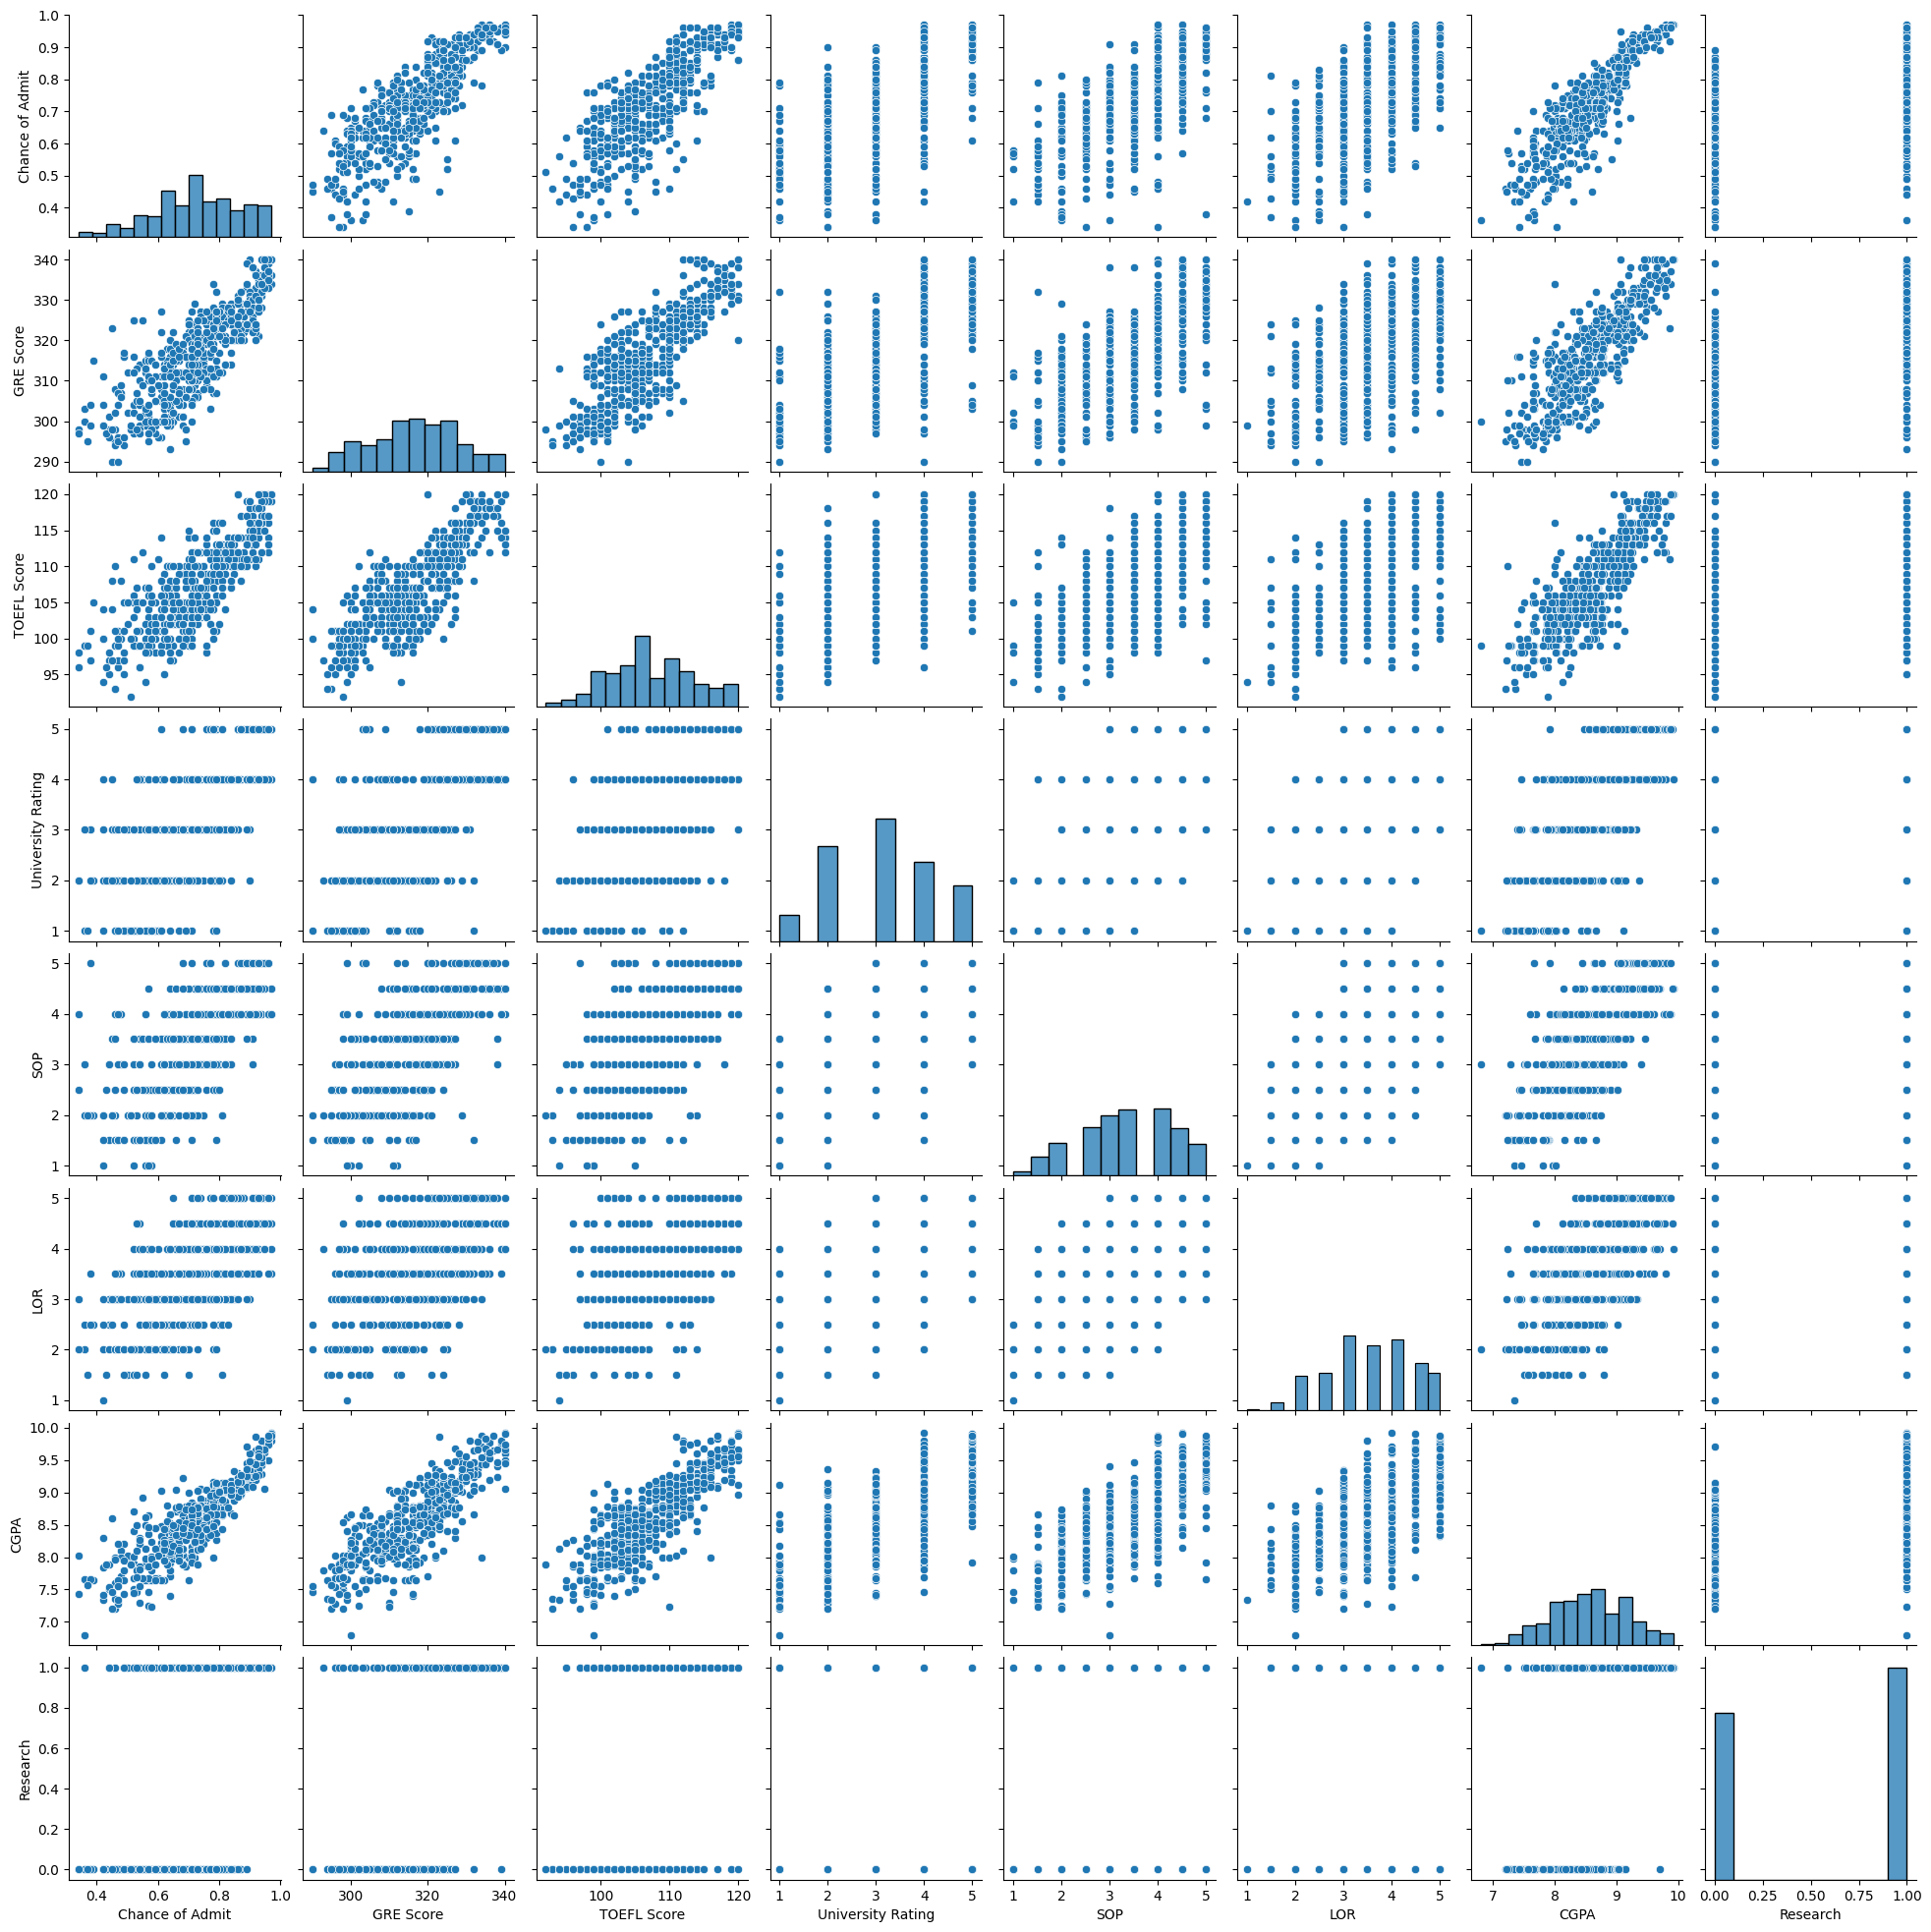

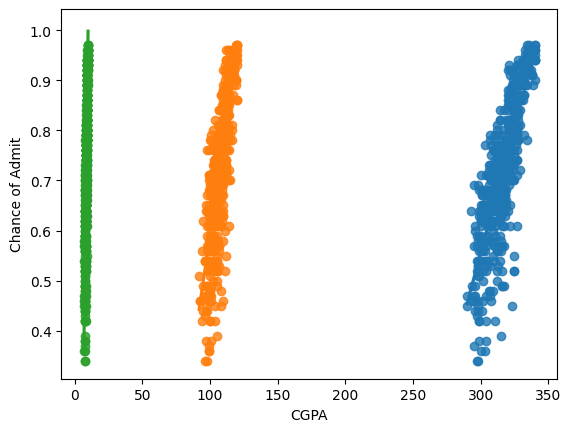

Pearson Correlation Matrix:
                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                        LOR      CGPA  Research  Chance of Admit  
GRE Score          0.524679  0.825878  0.563398         0.810351  
TOEFL Score        0.541563  0.810574  0.467012         0.792228  
University Rating  0.608651  0.705254  0.427047         0.690132  
SOP                0.663707  0.712154

In [ ]:
# 1. Scatter Plots for each independent variable vs target variable
sns.pairplot(df[['Chance of Admit', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']])
plt.show()

# 2. Regression Plots for each independent variable vs target
sns.regplot(x='GRE Score', y='Chance of Admit', data=df)
sns.regplot(x='TOEFL Score', y='Chance of Admit', data=df)
sns.regplot(x='CGPA', y='Chance of Admit', data=df)
plt.show()

# 3. Pearson Correlation
correlation_matrix = df.corr()
print("Pearson Correlation Matrix:")
print(correlation_matrix)


**Linear Relationship:**  Scatter plots and regression plots will visually confirm if there is a linear relationship between the independent variables and the target variable. Pearson correlation coefficients above 0.5 indicate a strong linear relationship.

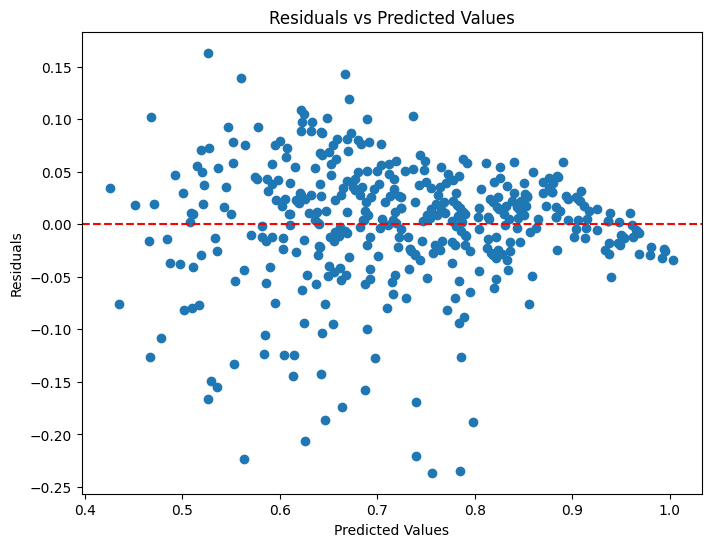

In [ ]:
X_train_dropped_with_const = sm.add_constant(X_train_dropped)

# Predict using the updated feature set
y_pred = model_dropped.predict(X_train_dropped_with_const)

# Calculate residuals
residuals = y_train - y_pred

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#8d. Test for Homoscedasticity

In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform Goldfeld-Quandt test
gq_test_result = het_goldfeldquandt(model.resid, X_train_dropped_with_const)

# Extract the test statistic and p-value from the result
gq_test_statistic = gq_test_result[0]
gq_p_value = gq_test_result[1]

# Print the results
print(f"Goldfeld-Quandt Test Statistic: {gq_test_statistic}")
print(f"Goldfeld-Quandt p-value: {gq_p_value}")


Goldfeld-Quandt Test Statistic: 0.9510305574981489
Goldfeld-Quandt p-value: 0.6365293632510345


#Insights:
The p-value is 0.6365, which is much higher than the commonly used threshold of 0.05.
A p-value greater than 0.05 suggests that there is no strong evidence of heteroscedasticity in the data.
Therefore, the assumption of homoscedasticity is valid, and we can conclude that the variance of the residuals is constant across all levels of the independent variables.

#8e. Normality of residuals

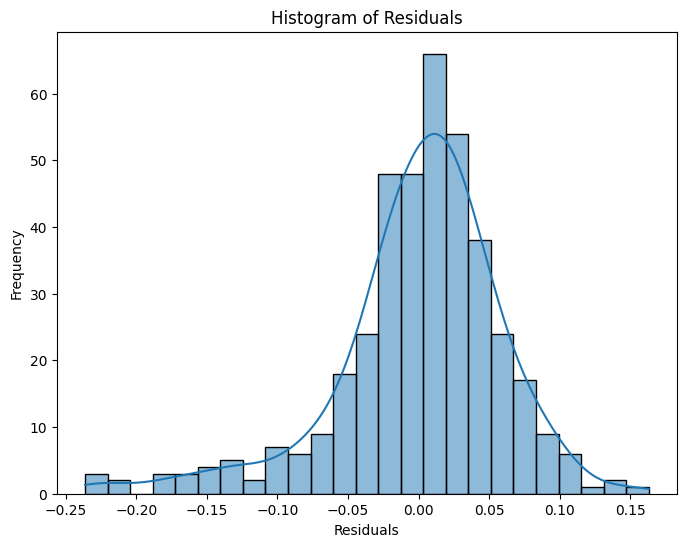

In [ ]:
residuals = model_dropped.resid

# 1. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

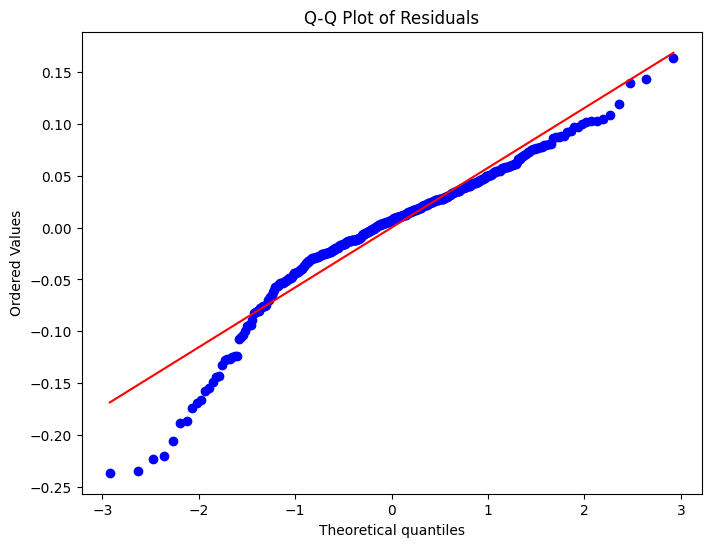

In [ ]:
# 2. Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

**Non-Normality of Residuals:** The residuals from the model are not normally distributed, as indicated by the left-skew in the histogram and the deviation from the diagonal in the Q-Q plot.

#9. Evaluate the model’s performance.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicting on the training data
y_train_pred = model_dropped.predict(X_train_dropped)

# 1. Calculate MAE
mae = mean_absolute_error(y_train, y_train_pred)

# 2. Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# 3. Calculate R-squared
r2 = r2_score(y_train, y_train_pred)

# 4. Calculate Adjusted R-squared
n = len(y_train)  # Number of observations
p = X_train_dropped.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")


MAE: 0.04269126483606392
RMSE: 0.05944028044169098
R-squared: 0.8207326947514393
Adjusted R-squared: 0.8179957893277972


#Insight:
MAE (0.0427) and RMSE (0.0594) suggest relatively small prediction errors on average, with slight room for improvement.
R-squared (0.8207) indicates the model explains 82% of the variance, showing a strong fit.
Adjusted R-squared (0.8180) confirms a well-fitted model while accounting for the number of predictors.
Overall, the model is accurate and explains most of the variance, with minor errors that can be reduced.

# 10. Provide Actionable Insights & Recommendations.
# Recommendations:
Data Transformation: Apply transformations like log or square root to address the left-skewed residuals and improve normality.
Feature Selection: Continuously monitor feature correlations and consider additional regularization methods (e.g., Lasso) to further reduce multicollinearity.
Model Improvements: Experiment with other models (e.g., Ridge Regression, Decision Trees) to potentially increase performance.
Outlier Treatment: Further investigate and possibly transform outliers to ensure model robustness.
By implementing these strategies, the model can be enhanced, improving predictive performance and stability.






